### Issues of masseges

In [557]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, pairwise
from sklearn.metrics import accuracy_score, balanced_accuracy_score, zero_one_loss, classification_report
from scipy.cluster import  hierarchy
from scipy.spatial.distance import pdist, cosine

In [558]:
df = pd.read_csv('test_data.csv', index_col=0)

In [559]:
target = df['target']

In [560]:
del df['target']

In [561]:
df

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,-0.480060,0.176260,0.198378,0.436684,0.172947,0.027392,-0.707964,0.320470,-0.233182,0.103358,...,-0.302409,-0.297128,-0.096548,0.139542,-0.145355,0.395182,0.082721,0.005400,-0.026441,-0.108023
1,-0.314651,-0.134033,-0.222847,-0.013558,0.016558,0.365967,-0.552682,-0.000281,-0.167029,0.117768,...,-0.042050,0.095499,-0.255792,-0.017712,-0.190932,0.082872,0.441845,0.110383,0.031139,0.039577
2,-0.300815,-0.084558,0.181238,0.005055,0.313164,0.112452,-0.635594,0.402153,-0.439029,0.171474,...,0.449078,0.534868,-0.110871,-0.540410,-0.421506,0.294148,0.123150,-0.076787,0.126006,0.108019
3,-0.278396,0.168551,0.179791,0.039391,0.492830,0.185413,-0.388475,0.083588,-0.186267,0.154887,...,0.159299,0.171783,-0.139541,-0.078331,-0.371579,0.283624,0.286695,0.068057,0.146644,0.114814
4,-0.252944,0.385547,-0.134255,0.069152,0.197859,0.296981,-0.387140,0.447478,-0.432704,-0.040401,...,-0.090061,-0.092603,-0.152751,-0.058263,-0.283934,0.223888,0.114866,0.059671,-0.033000,-0.073733
5,-0.461863,0.244228,-0.111868,0.618051,0.087170,0.059653,-0.738002,0.568165,-0.222848,0.008579,...,-0.399111,-0.443065,-0.408730,0.027526,-0.148179,0.634412,0.278855,0.226264,-0.018455,-0.069331
6,0.025555,0.139888,0.327845,0.450713,0.124247,0.456831,-0.763680,0.280400,-0.339392,-0.093317,...,-0.489655,-0.238432,0.134196,-0.019604,-0.130189,0.263778,-0.162294,0.085192,-0.062538,-0.576098
7,0.129552,0.063912,0.066860,-0.108391,0.253909,-0.073994,-0.462310,0.083999,-0.150584,-0.189251,...,0.040532,-0.039387,-0.196232,0.072493,0.296989,0.137324,-0.257739,-0.291723,-0.047468,-0.330186
8,-0.025592,-0.133010,0.128675,-0.251296,-0.029450,-0.045633,-0.142553,0.013037,-0.336681,0.015302,...,-0.356453,-0.010930,0.267549,0.678375,0.377542,0.120559,0.178443,-0.259181,0.096659,-0.110265
9,0.244264,0.281641,-0.030179,0.004351,-0.080709,0.219231,-0.058184,-0.086386,0.135524,-0.151006,...,-0.245197,0.010838,0.095822,0.267558,-0.070276,-0.060784,0.246062,-0.363341,-0.046501,-0.321068


### Calculating correlation matrix

In [562]:
corr = df.corr()

In [563]:
corr

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
var_0,1.000000,-0.212095,-0.510467,-0.632337,-0.435808,-0.455056,0.386311,-0.485594,-0.229486,-0.619411,...,0.009439,-0.112631,0.609323,0.172583,0.415746,-0.165141,-0.362169,-0.679157,-0.628545,-0.741089
var_1,-0.212095,1.000000,0.131534,0.468390,0.127430,0.191790,0.098977,-0.064769,0.438854,0.056648,...,-0.060091,-0.236400,-0.268048,0.151409,-0.197565,-0.067595,0.120523,-0.106168,-0.025998,-0.115844
var_2,-0.510467,0.131534,1.000000,0.320131,0.476286,0.452468,0.037508,-0.040672,0.566988,0.456242,...,0.026881,0.365443,-0.267411,0.114091,0.011578,-0.274732,0.268575,0.153947,0.437112,0.242133
var_3,-0.632337,0.468390,0.320131,1.000000,0.080498,0.410614,-0.423358,0.526743,0.176001,0.117445,...,-0.406555,-0.361854,-0.511871,-0.171901,-0.387685,0.236622,0.162784,0.542720,0.140047,0.227801
var_4,-0.435808,0.127430,0.476286,0.080498,1.000000,0.295433,-0.121215,0.079428,0.069288,0.498832,...,0.506141,0.348091,-0.292288,-0.316033,-0.218745,0.043990,-0.088845,0.315624,0.251744,0.377467
var_5,-0.455056,0.191790,0.452468,0.410614,0.295433,1.000000,0.195559,0.065810,0.268696,0.159295,...,-0.010607,0.311539,-0.404648,-0.022116,-0.150731,-0.500002,0.320605,0.329695,0.003760,0.452037
var_6,0.386311,0.098977,0.037508,-0.423358,-0.121215,0.195559,1.000000,-0.703367,0.370251,-0.091495,...,0.283892,0.384594,-0.002153,0.513783,0.445655,-0.847312,0.455957,-0.704827,-0.439033,0.015557
var_7,-0.485594,-0.064769,-0.040672,0.526743,0.079428,0.065810,-0.703367,1.000000,-0.515012,-0.140749,...,-0.308812,-0.255374,-0.205262,-0.526903,-0.462856,0.641575,-0.271996,0.748193,0.346425,0.374140
var_8,-0.229486,0.438854,0.566988,0.176001,0.069288,0.268696,0.370251,-0.515012,1.000000,0.301944,...,0.072820,0.203949,-0.378520,0.374070,0.108289,-0.515713,0.578117,-0.248617,0.182375,0.049815
var_9,-0.619411,0.056648,0.456242,0.117445,0.498832,0.159295,-0.091495,-0.140749,0.301944,1.000000,...,0.417815,0.410599,-0.291132,-0.101134,-0.365877,0.020538,0.486086,0.248643,0.487468,0.435114


### Visualize correlation matrix

In [564]:
corr.style.background_gradient(cmap='coolwarm')


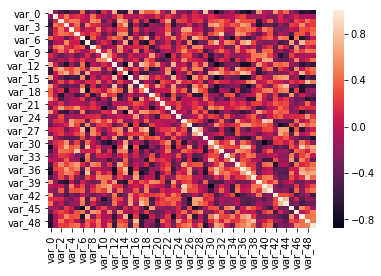

In [565]:
sns.heatmap(corr)

Seems that there are nothing helpfull

### Calculating cosine pairwise distance

In [566]:
cosine_distance = pd.DataFrame(pairwise.cosine_distances(df))

In [567]:
cosine_distance.style.background_gradient(cmap='coolwarm_r')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0.137612,0.380047,0.180314,0.112991,0.0456242,0.0940886,0.253802,0.271118,0.267539,0.47134,0.470486,0.555337,0.719386,0.413389,0.245725
1,0.137612,0,0.308287,0.137905,0.153551,0.138167,0.183431,0.277864,0.365307,0.278194,0.485979,0.469855,0.479225,0.735061,0.470209,0.266302
2,0.380047,0.308287,0,0.210074,0.335908,0.362454,0.503121,0.599748,0.648746,0.707215,0.820441,0.690892,0.868755,0.940784,0.75477,0.52948
3,0.180314,0.137905,0.210074,0,0.159858,0.194874,0.226484,0.409765,0.502387,0.442912,0.622346,0.639207,0.689779,0.857344,0.579057,0.368725
4,0.112991,0.153551,0.335908,0.159858,0,0.118417,0.1406,0.260761,0.36817,0.296002,0.472675,0.514412,0.504261,0.630016,0.365622,0.251726
5,0.0456242,0.138167,0.362454,0.194874,0.118417,0,0.137811,0.330718,0.391999,0.351998,0.58095,0.515467,0.582408,0.714151,0.443901,0.251839
6,0.0940886,0.183431,0.503121,0.226484,0.1406,0.137811,0,0.230042,0.359756,0.25742,0.47841,0.524749,0.522794,0.646248,0.341222,0.209104
7,0.253802,0.277864,0.599748,0.409765,0.260761,0.330718,0.230042,0,0.288022,0.201782,0.301625,0.470355,0.474319,0.522851,0.31021,0.322222
8,0.271118,0.365307,0.648746,0.502387,0.36817,0.391999,0.359756,0.288022,0,0.171617,0.230845,0.296482,0.449761,0.700993,0.394649,0.414455
9,0.267539,0.278194,0.707215,0.442912,0.296002,0.351998,0.25742,0.201782,0.171617,0,0.237098,0.286081,0.339416,0.532515,0.280279,0.316533


It seems that first 6 rows have correlation and last 3 rows have correlation

### K-means algothm

Lets find optimal number of clusters using k-means algorithm and elbow method

In [568]:
Sum_of_squared_distances = []
K = range(1,df.shape[0])
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    

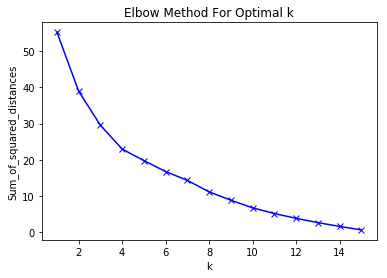

In [569]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [570]:
def numb_of_clust(sqrt_dst):
    sqrt_dst_dict = {}
    for i in range(1, len(sqrt_dst)-1):
        sqrt_dst_dict[i+1] = (sqrt_dst[i+1] - sqrt_dst[i])/(sqrt_dst[i] - sqrt_dst[i-1])      
    return min(sqrt_dst_dict, key=lambda unit: sqrt_dst_dict[unit])

In [571]:
print("Number of clusters -- %i" % numb_of_clust(Sum_of_squared_distances))

Number of clusters -- 4


In [572]:
km = KMeans(n_clusters=numb_of_clust(Sum_of_squared_distances), random_state=0).fit(df)

In [573]:
kpredict = km.predict(df)

In [574]:
def unsupervised_results(predicted_labels_unsupervised,recieved_labels):
    print(homogeneity_score(predicted_labels_unsupervised,recieved_labels))

In [575]:
def accuracy_check(model, x_test, y_test):
#     Load here the model and validation set data to test
    # test accuracy
    y_pred_ts = model.predict(x_test)
    predictions_ts = [round(value) for value in y_pred_ts]
    accuracy2 = accuracy_score(y_test, predictions_ts)
    print("Accuracy on test: %.2f%%" % (accuracy2 * 100.0))
    baccuracy2 = balanced_accuracy_score(y_test, predictions_ts)
    print("Balanced Accuracy on test: %.2f%%" % (baccuracy2 * 100.0))
    z12 = zero_one_loss(y_test, predictions_ts)
    print("Zero One Loss on test: %.2f%%" % (z12 * 100))
    class_rep2 = classification_report(y_test, predictions_ts)
    print(class_rep2)

In [576]:
unsupervised_results(kpredict, target)

0.6370255273574893


In [577]:
accuracy_check(km, df, target)

Accuracy on test: 75.00%
Balanced Accuracy on test: 83.33%
Zero One Loss on test: 25.00%
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         0

   micro avg       0.75      0.75      0.75        16
   macro avg       0.71      0.62      0.64        16
weighted avg       0.95      0.75      0.80        16



/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [590]:
import pickle
model_filename = 'model.sav'
pred_filename = 'pred.sav'
pickle.dump(km, open(model_filename, 'wb'))
pickle.dump(kpredict, open(pred_filename, 'wb'))

For notes: seems that agglomerative clustering doesn't have such a good result as k-means

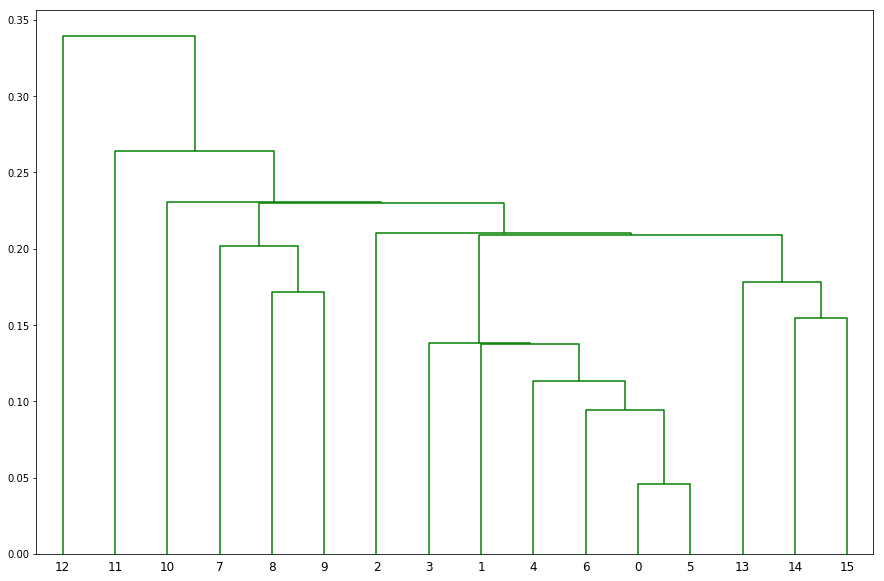

In [578]:
distance_mat = pdist(df, metric='cosine') 
Z = hierarchy.linkage(distance_mat, 'single') 
plt.figure(figsize=(15, 10))
dn = hierarchy.dendrogram(Z, color_threshold=0.5) 

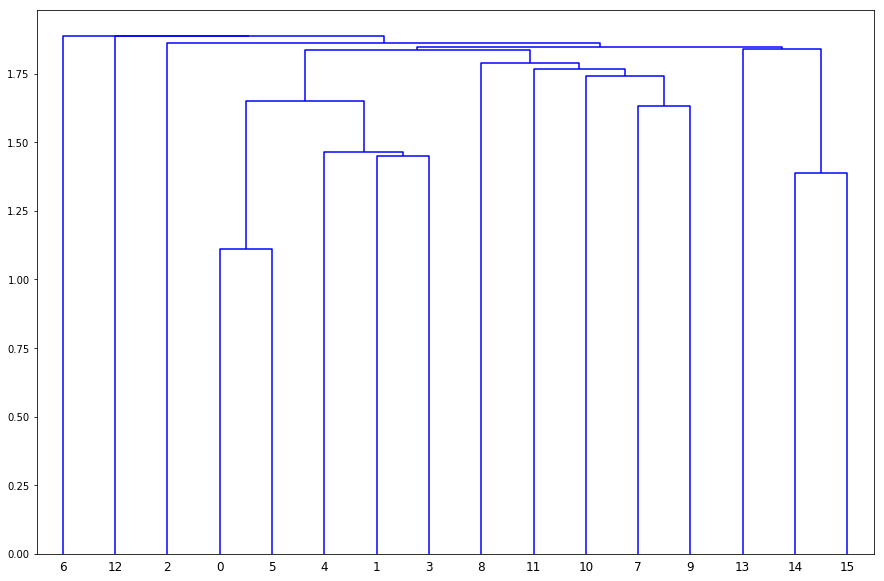

In [579]:
distance_mat = pdist(df, metric='euclid') 
Z = hierarchy.linkage(distance_mat, 'single') 
plt.figure(figsize=(15, 10))
dn = hierarchy.dendrogram(Z, color_threshold=0.5) 